## Lab | Customer Analysis Round 7-2 Machine Learning

Processing Data - Numerical

In [37]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

In [38]:
marketing = pd.read_csv("Data/marketing_customer_analysis.csv")

In [39]:
numerical = marketing.select_dtypes(np.number)

In [40]:
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


1. Plot the distribution of the different numerical values

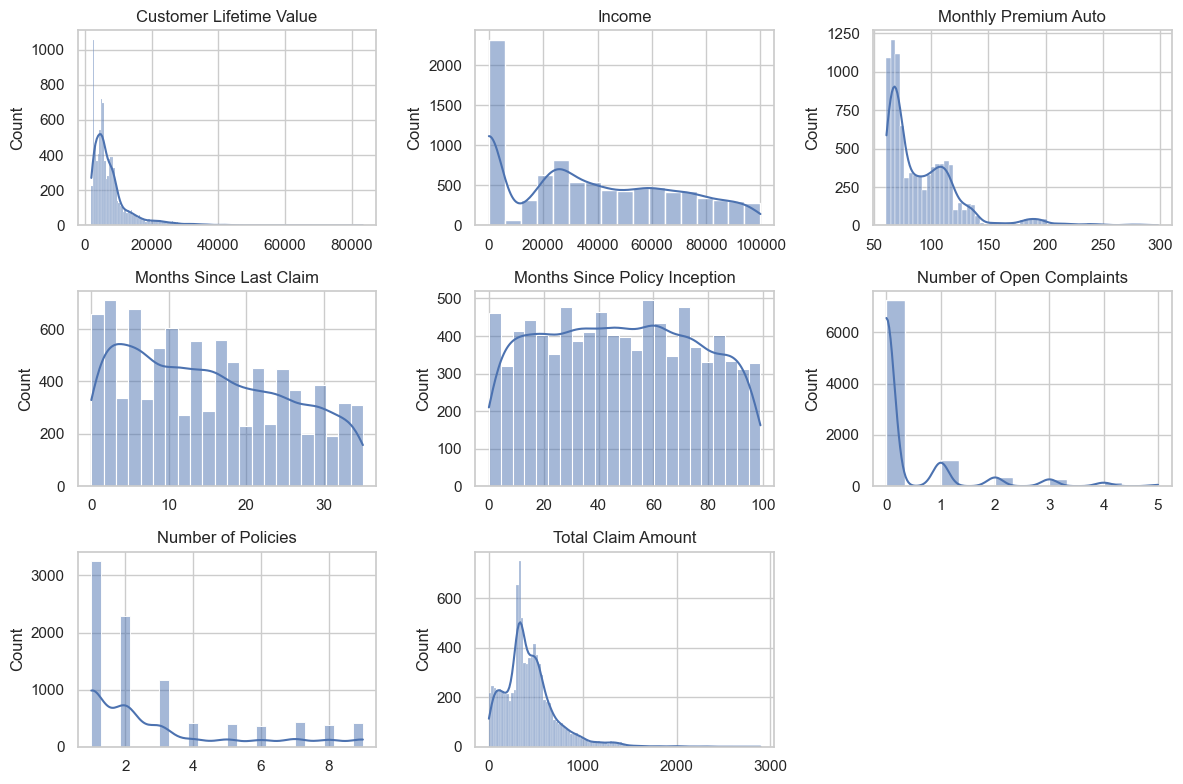

In [41]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical.columns):
    plt.subplot(3, 3, i+1)  
    sns.histplot(numerical[column], kde=True)  
    plt.title(column)  
    plt.xlabel('')  

plt.tight_layout()
plt.show()

2. Check and deal with null values

In [42]:
nulls = pd.DataFrame(numerical.isna().sum()/len(numerical))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,Customer Lifetime Value,0.0
1,Income,0.0
2,Monthly Premium Auto,0.0
3,Months Since Last Claim,0.0
4,Months Since Policy Inception,0.0
5,Number of Open Complaints,0.0
6,Number of Policies,0.0
7,Total Claim Amount,0.0


In [43]:
#Customer lifetime value
#Monthly Premium Auto
#Number of open complaints
#Total Claim amount 
#are hghly skewed (positive skewness) so before I deal with outliers I can try transformations with logarithmic
#transformation as is highly skewed

In [44]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

In [45]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

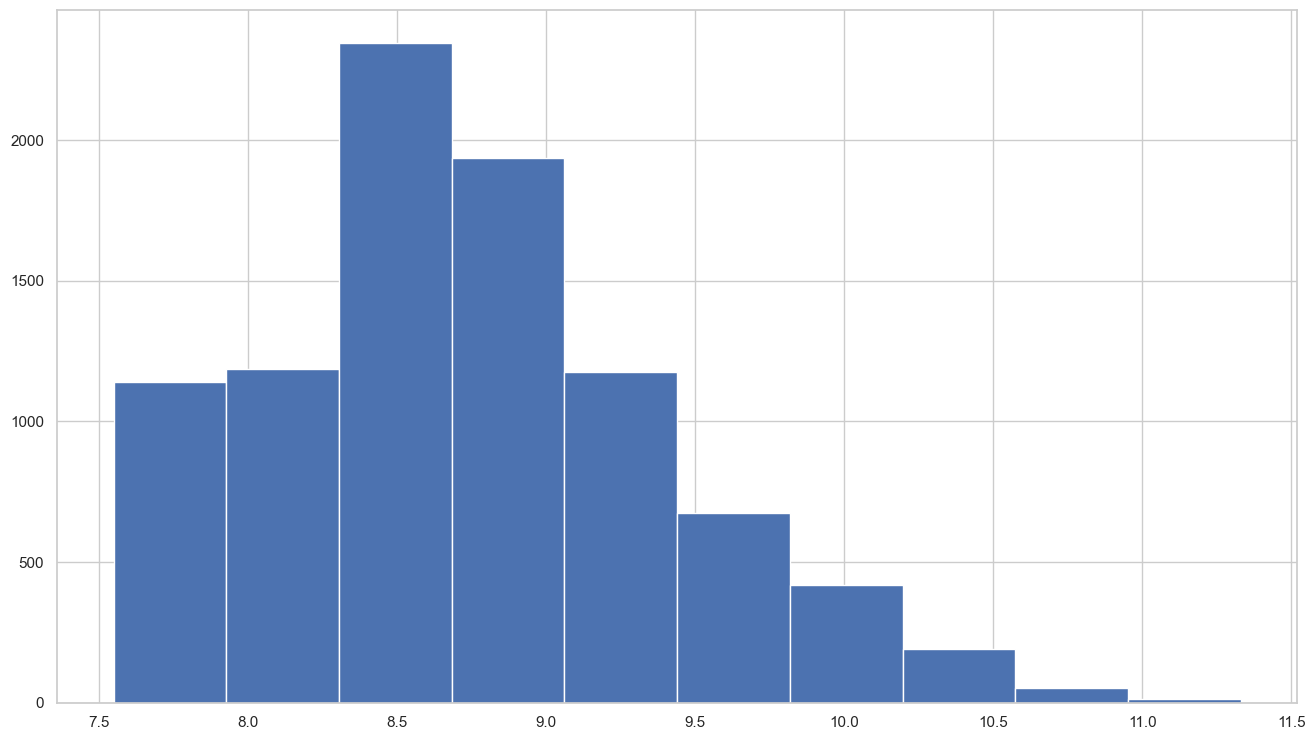

In [46]:
pd.Series(map(log_transfom_clean_, numerical['Customer Lifetime Value'])).hist()
plt.show()

C:\Users\Elsa\AppData\Local\Temp\ipykernel_9032\2837299982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['Customer Lifetime Value'])


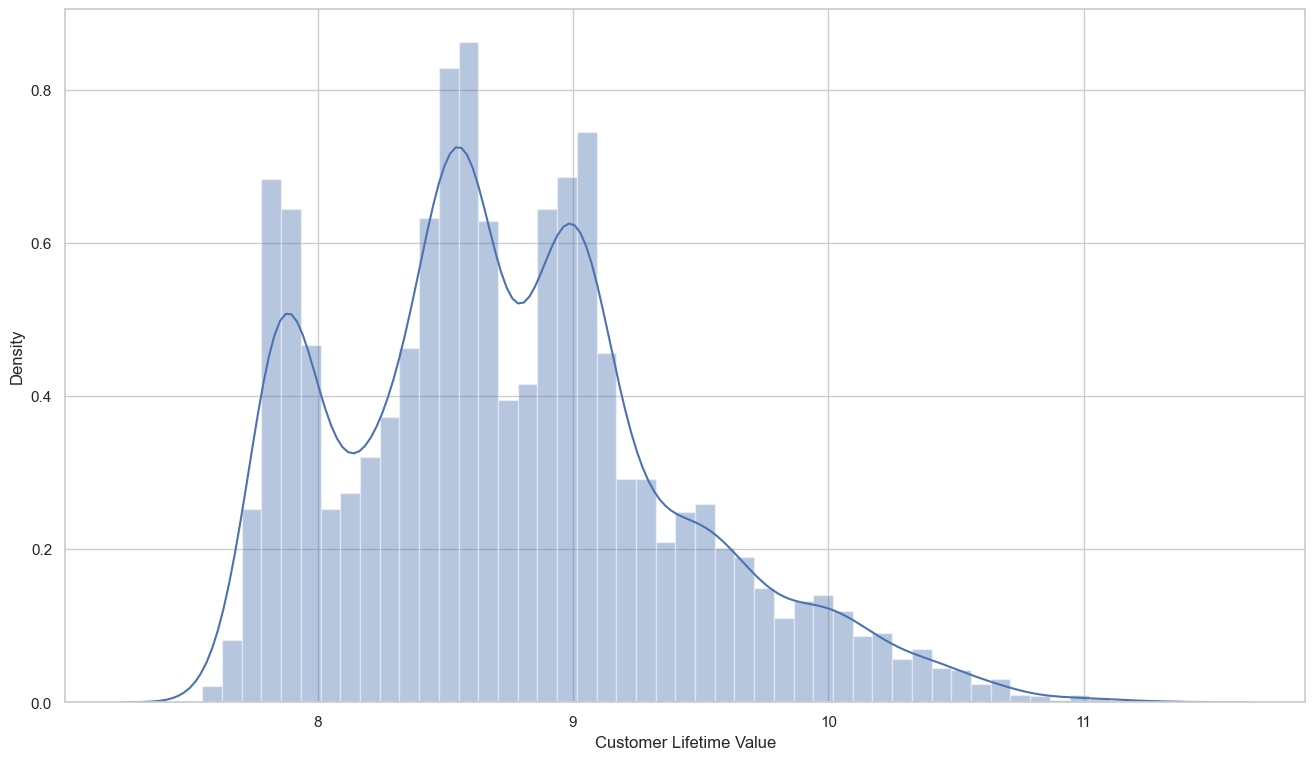

In [47]:
## Use log transformation to replace the values of the column
numerical['Customer Lifetime Value'] = list(map(log_transfom_clean_, numerical['Customer Lifetime Value']))
numerical['Customer Lifetime Value'] = numerical['Customer Lifetime Value'].fillna(np.mean(numerical['Customer Lifetime Value']))
sns.distplot(numerical['Customer Lifetime Value'])
plt.show()

C:\Users\Elsa\AppData\Local\Temp\ipykernel_9032\3595747225.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['Monthly Premium Auto'])


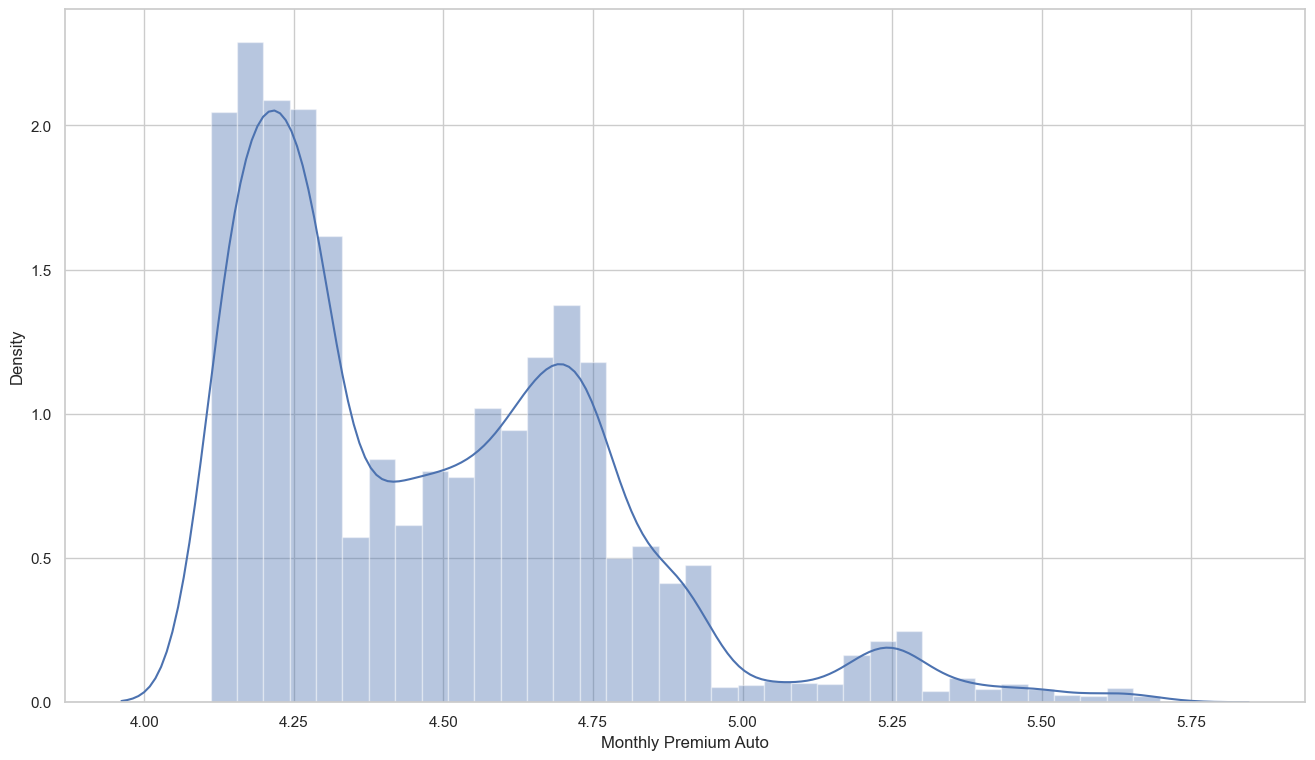

In [48]:
numerical['Monthly Premium Auto'] = list(map(log_transfom_clean_, numerical['Monthly Premium Auto']))
numerical['Monthly Premium Auto'] = numerical['Monthly Premium Auto'].fillna(np.mean(numerical['Monthly Premium Auto']))
sns.distplot(numerical['Monthly Premium Auto'])
plt.show()

3. Check and deal with outliers

<function matplotlib.pyplot.show(close=None, block=None)>

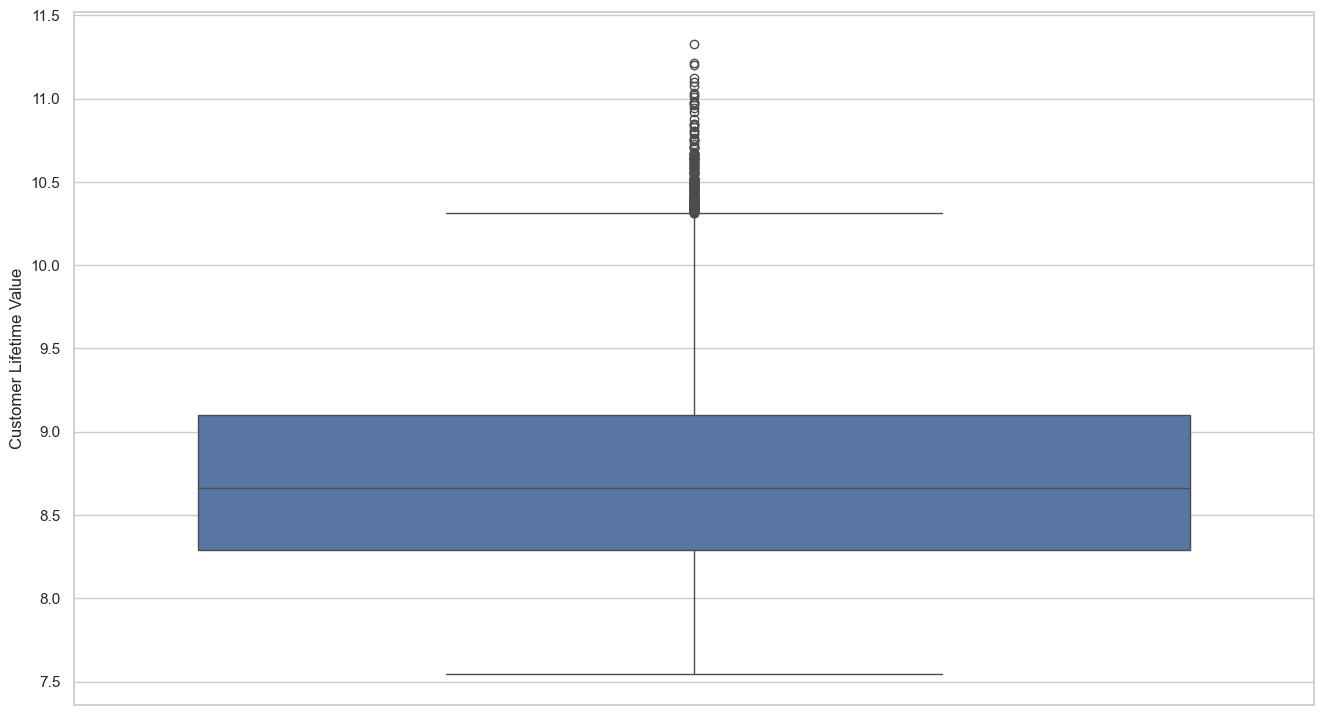

In [49]:
#box plots o scatter plots para chekear outliers
sns.boxplot(y=numerical['Customer Lifetime Value'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

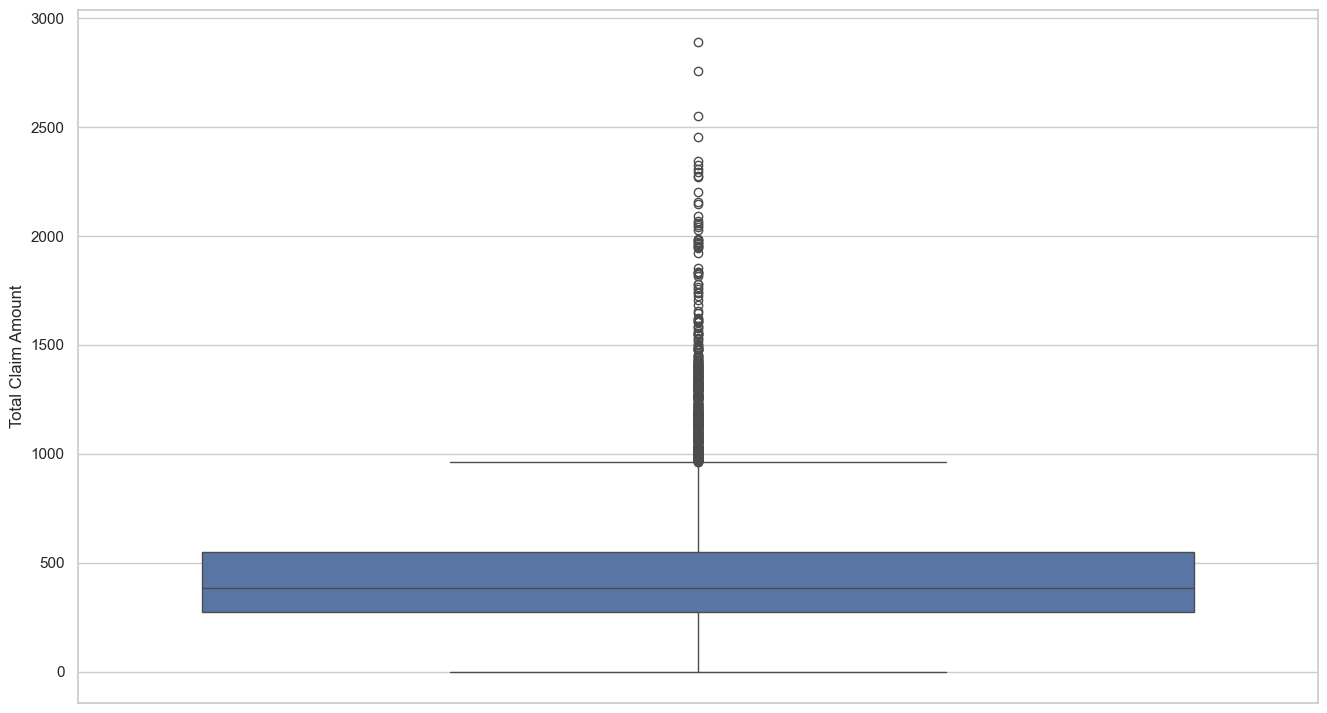

In [50]:
sns.boxplot(y=numerical['Total Claim Amount'])
plt.show

In [51]:
numerical.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8.748562,37657.380009,4.482330,15.097000,48.064594,0.384388,2.966170,434.088794
std,0.652919,30379.904734,0.308007,10.073257,27.905991,0.910384,2.390182,290.500092
min,7.548560,0.000000,4.110874,0.000000,0.000000,0.000000,1.000000,0.099007
25%,8.292612,0.000000,4.219508,6.000000,24.000000,0.000000,1.000000,272.258244
50%,8.662190,33889.500000,4.418841,14.000000,48.000000,0.000000,2.000000,383.945434
75%,9.100767,62320.000000,4.691348,23.000000,71.000000,0.000000,4.000000,547.514839
max,11.330508,99981.000000,5.697093,35.000000,99.000000,5.000000,9.000000,2893.239678


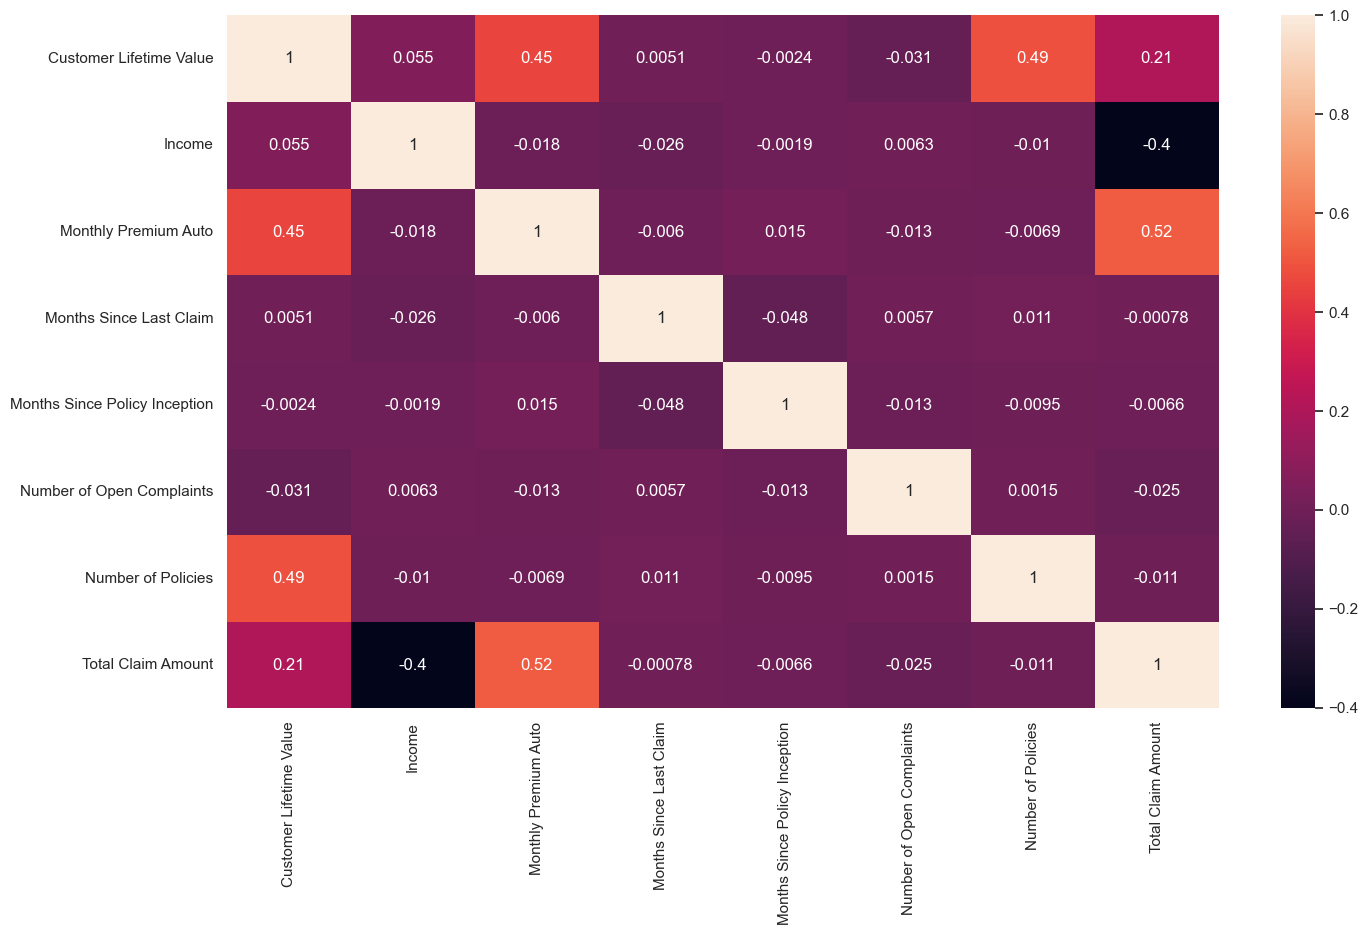

In [52]:
#Revisando correlación entre variables
heatmap = numerical.corr(method = 'spearman')
sns.heatmap(heatmap, annot=True)
plt.show()

In [53]:
numerical.Income.replace(0, np.nan, inplace=True)

C:\Users\Elsa\AppData\Local\Temp\ipykernel_9032\4019784100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical.Income.replace(0, np.nan, inplace=True)


In [54]:
numerical.Income = numerical.Income.fillna(np.mean(numerical.Income))

C:\Users\Elsa\AppData\Local\Temp\ipykernel_9032\2752688652.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(open_comp)


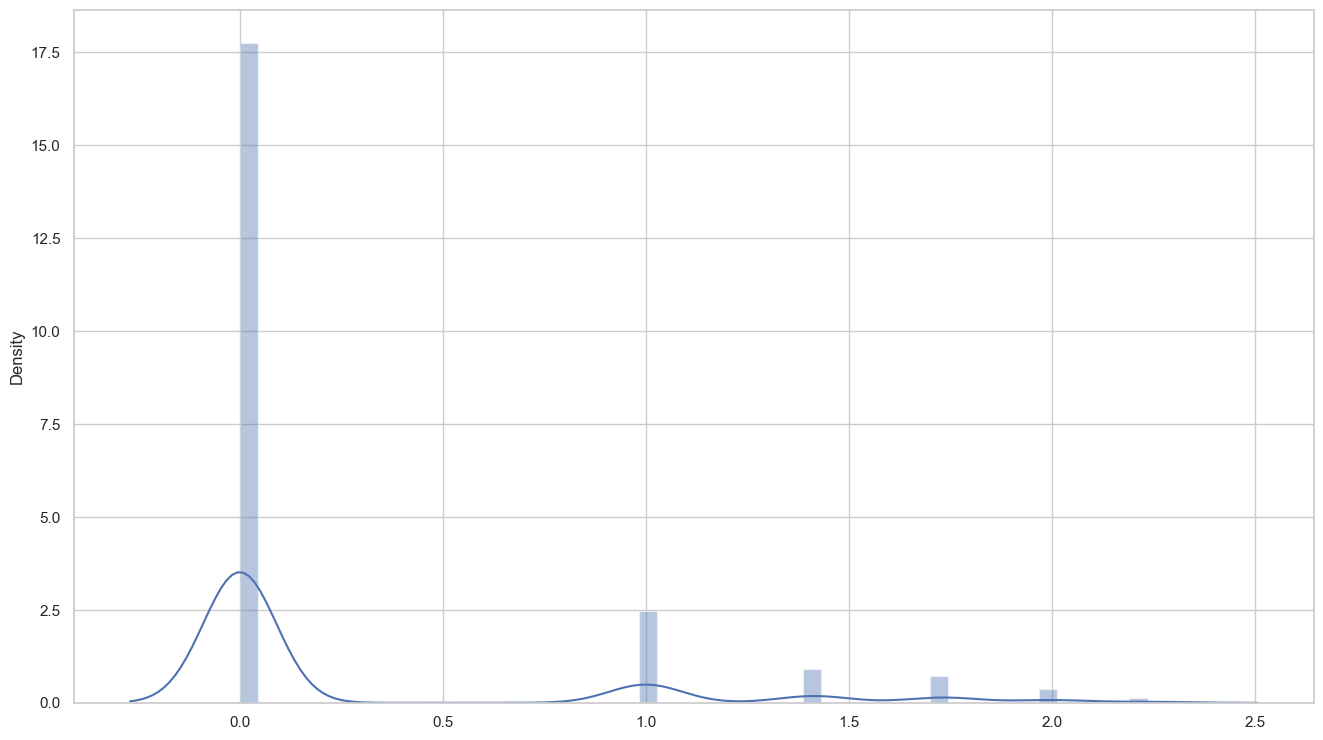

In [55]:
open_comp = list(map(sqrt_transfom_clean_, numerical['Number of Open Complaints']))
sns.distplot(open_comp)
plt.show()

In [56]:
numerical.sample()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
279,8.203176,39679.0,4.521789,2,85,0,1,641.388616


In [57]:
numerical['open_comp']=open_comp
numerical=numerical.drop(['Number of Open Complaints'], axis=1)

C:\Users\Elsa\AppData\Local\Temp\ipykernel_9032\1414554188.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nr_policies)


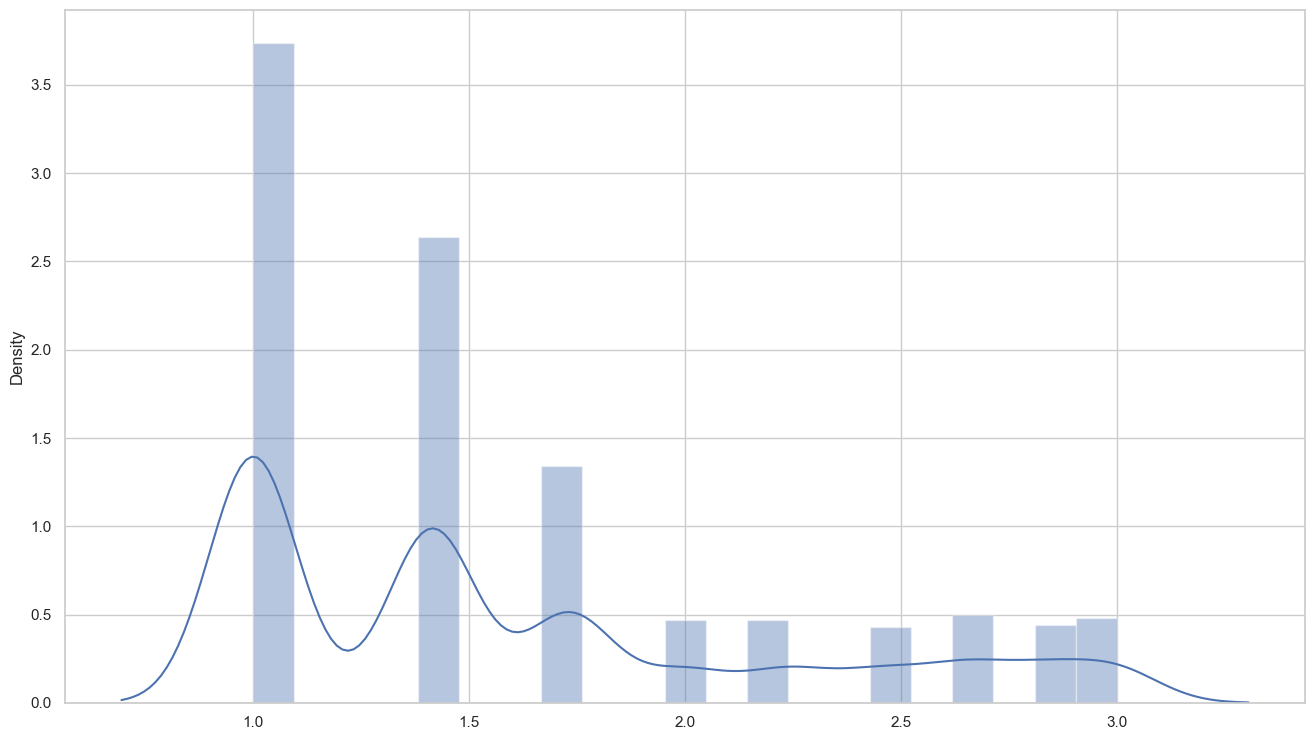

In [58]:
nr_policies = list(map(sqrt_transfom_clean_, numerical['Number of Policies']))
sns.distplot(nr_policies)
plt.show()

In [59]:
numerical['nr_policies']=nr_policies
numerical=numerical.drop(['Number of Policies'], axis=1)

In [60]:
#tratando los outliers :
iqr = np.percentile(numerical['Customer Lifetime Value'],75) - np.percentile(numerical['Customer Lifetime Value'],25)
upper_limit = np.percentile(numerical['Customer Lifetime Value'],75)+1.5*iqr

In [61]:
new_numerical = numerical[numerical['Customer Lifetime Value']>upper_limit]

In [62]:
len(new_numerical)

185

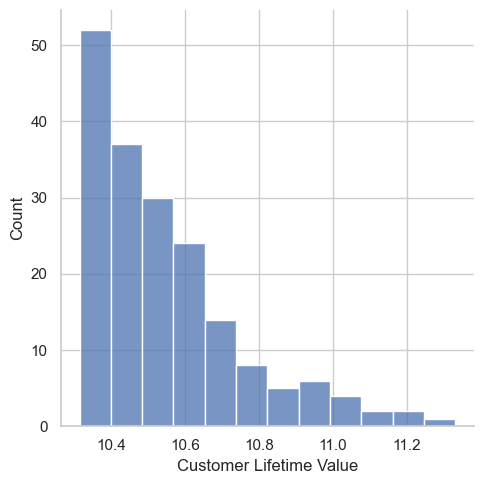

In [63]:
numerical = numerical[numerical['Customer Lifetime Value']>upper_limit]
sns.displot(numerical['Customer Lifetime Value'])
plt.show()

In [64]:
iqr = np.percentile(numerical['Monthly Premium Auto'],75) - np.percentile(numerical['Monthly Premium Auto'],25)
upper_limit = np.percentile(numerical['Monthly Premium Auto'],75)+1.5*iqr

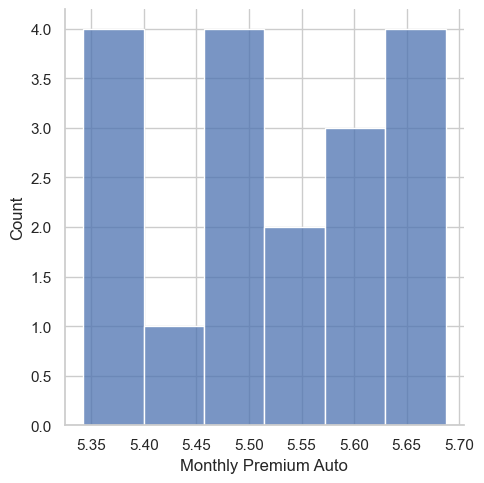

In [65]:
numerical = numerical[numerical['Monthly Premium Auto']>upper_limit]
sns.displot(numerical['Monthly Premium Auto'])
plt.show()

In [66]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 832 to 9049
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        18 non-null     float64
 1   Income                         18 non-null     float64
 2   Monthly Premium Auto           18 non-null     float64
 3   Months Since Last Claim        18 non-null     int64  
 4   Months Since Policy Inception  18 non-null     int64  
 5   Total Claim Amount             18 non-null     float64
 6   open_comp                      18 non-null     float64
 7   nr_policies                    18 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 1.3 KB


4. Normalize columns

In [70]:
Y = numerical['Total Claim Amount']
X_ = numerical.drop(['Total Claim Amount'], axis=1)

In [71]:
X_.sample()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,open_comp,nr_policies
5485,10.499384,18047.0,5.488938,5,50,0.0,1.414214


In [72]:
transformer = MinMaxScaler().fit(X_)
transformer
x_scaled=transformer.transform(X_)
print(x_scaled.shape)
pd.DataFrame(x_scaled)

(18, 7)


,0,1,2,3,4,5,6
0,0.136590,0.237178,1.000000,0.40625,0.345679,0.0,0.0
1,0.068418,0.379390,0.721483,0.59375,0.481481,0.0,0.0
2,0.427201,0.908530,0.340213,0.21875,0.530864,1.0,0.0
3,0.885189,0.453287,0.425380,0.00000,0.197531,0.0,0.0
4,0.144309,0.535616,1.000000,0.31250,0.629630,0.0,0.0
5,0.704008,0.453287,0.377020,0.56250,0.135802,0.0,0.0
6,0.330507,0.453287,0.858924,0.46875,0.913580,1.0,0.0
7,0.617242,0.827844,0.879502,1.00000,0.925926,0.0,0.0
8,0.347993,0.467937,0.148831,0.90625,1.000000,0.0,0.0
9,0.297513,0.055120,0.000000,0.34375,0.543210,0.0,0.0


In [74]:
transformer = StandardScaler().fit(X_)
x_normalized=transformer.transform(X_)
print(x_normalized.shape)
pd.DataFrame(x_normalized)

(18, 7)


,0,1,2,3,4,5,6
0,-0.852311,-0.843165,1.615777,-0.114878,-0.524375,-0.534522,0.0
1,-1.077031,-0.348953,0.698021,0.475922,-0.036928,-0.534522,0.0
2,0.105660,1.489908,-0.558324,-0.705677,0.140326,1.870829,0.0
3,1.615371,-0.092146,-0.277684,-1.394943,-1.056135,-0.534522,0.0
4,-0.826864,0.193961,1.615777,-0.410277,0.494832,-0.534522,0.0
5,1.018126,-0.092146,-0.437040,0.377455,-1.277701,-0.534522,0.0
6,-0.213082,-0.092146,1.150909,0.082055,1.514039,1.870829,0.0
7,0.732112,1.209507,1.218719,1.755987,1.558352,-0.534522,0.0
8,-0.155442,-0.041237,-1.188956,1.460587,1.824232,-0.534522,0.0
9,-0.321844,-1.475852,-1.679378,-0.311811,0.184639,-0.534522,0.0


5. Conduct Linear Regressions
- Using Statsmodels
- Using sklearn
- Interpret results
- Compare with previous lab
- Repeat Linear Regressions but standarizing columns instead of normalizing and check for differences

In [75]:
X = sm.add_constant(x_normalized)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                 -0.280
Method:                 Least Squares   F-statistic:                    0.3797
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.877
Time:                        22:51:33   Log-Likelihood:                -135.64
No. Observations:                  18   AIC:                             285.3
Df Residuals:                      11   BIC:                             291.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1385.2930    136.652     10.137      0.0

c:\Users\Elsa\anaconda3\envs\IronHackTest\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)
c:\Users\Elsa\anaconda3\envs\IronHackTest\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [77]:
lm = linear_model.LinearRegression()
model = lm.fit(x_normalized,Y)
print("R2 value is:", round(lm.score(x_normalized,Y),2))

R2 value is: 0.17


In [78]:
lm = linear_model.LinearRegression()
model = lm.fit(x_scaled,Y)
print("R2 value is:", round(lm.score(x_scaled,Y),2))

R2 value is: 0.17


En esta ocasión el resultado es peor que el anterior lab,  tal vez al eliminar outliers que aportan información necesaria o tratar demasiadas variables de distinta forma ha empeorado el resultado , el caso es que hay mucho margen de mejora y se tendria que revisar el modelo des de diferente perspectiva y con distintos tratamientos de las variables.